# Questoin 1
- Using enron dataset perform 3 analysis

In [11]:
import os
import glob
from email.parser import Parser
import email.utils
import csv
import operator
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
current_path =os.path.expanduser('~')
current_path =os.path.join(current_path,'midterm')
current_path =os.path.join(current_path,'data')
current_path =os.path.join(current_path,'enron')
current_path =os.path.join(current_path,'maildir')
print(current_path)

C:\Users\jaina\midterm\data\enron\maildir


In [3]:
def create_path(path):
    for entry in os.scandir(path):
        #print(path)
        if not entry.name.startswith('.') and entry.is_dir():
            add_path = entry.name
            appendedPath = os.path.join(path, add_path)
            path_list.append(appendedPath)
            create_path(appendedPath)

In [4]:
path_list = []
path_list = list(set(path_list))
create_path(current_path)

In [5]:
def plot_graph(year,xvalues,yvalues):
    fig, ax = plt.subplots(figsize=(10,5))
    plt.bar(xvalues,
        #using df['pre_score'] data,
        yvalues,
        # of width
        width = 0.25,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#54c1b7',
        # with label the first value in first_name
        label='February')


    # Set the y axis label
    ax.set_ylabel('Number of Emails Sent')
    # Set the x axis label
    ax.set_xlabel('Months')

    #Setting the x-axis and y-axis limits
    plt.xlim(1,12)
    plt.ylim(0,3000)

    # Set the chart's title
    ax.set_title('Emails Sent in '+str(year))
    #xTickMarks = ['February', 'March']
    #width = 2
    ax.set_xticks([p for p in xvalues])
    #xtickNames = ax.set_xticklabels(xTickMarks)
    #plt.setp(xtickNames, rotation=45, fontsize=10)

    # Adding the legend and showing the plot
    #plt.legend(['Baseketball', 'Baseball','Football'], loc='upper right')
    #plt.grid()
    plt.show()

# Analysis 1 
- with the data available , calculating the number of mails sent for each year and each month

1999


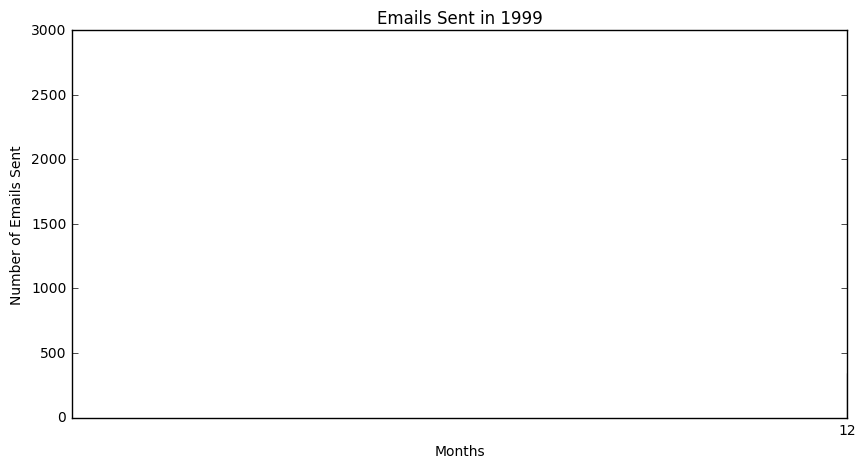

2000


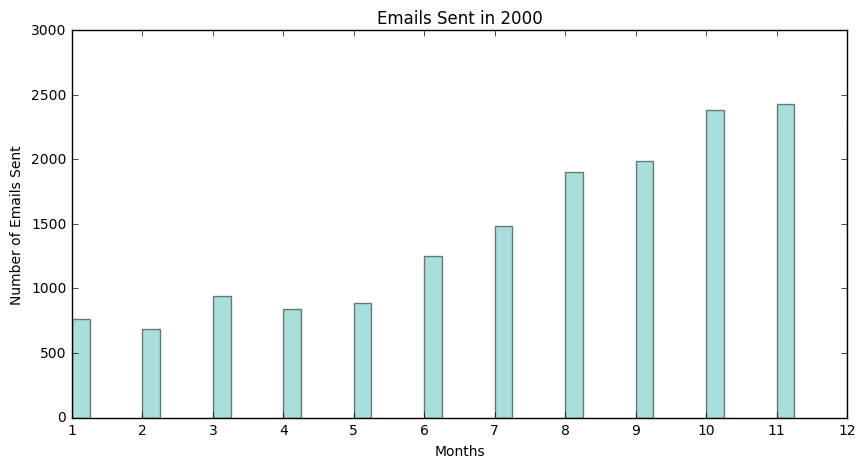

2001


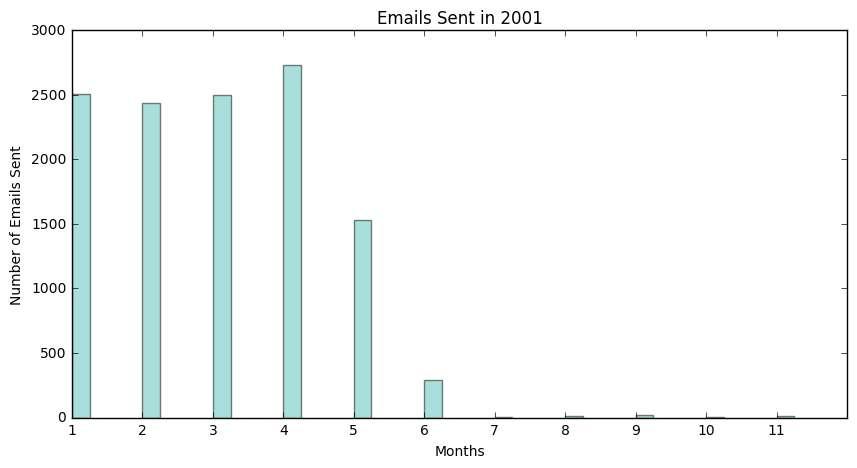

2002


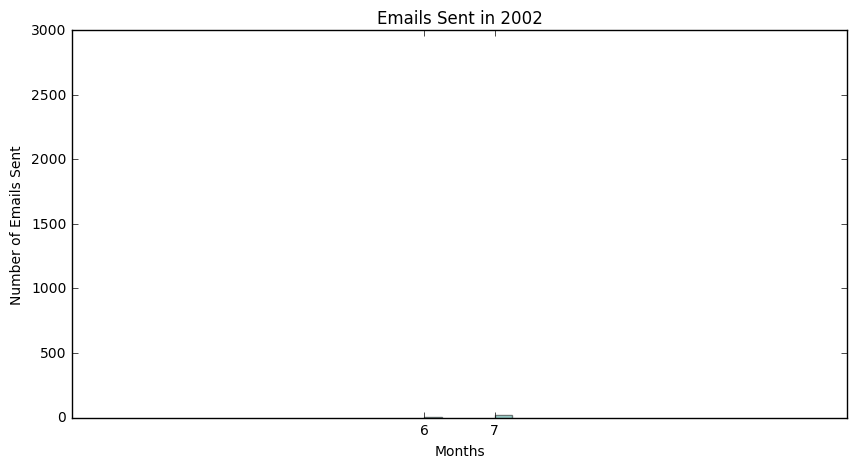

In [6]:
year_list = []
email_year = {}
content =''
for path in path_list:
    if path.endswith('\_sent_mail'):
                
        x = glob.glob(path+ '\\' + '*')
        #print(x)
        for file in x:
            #print(file)
            if os.path.isfile(file): 
                with open(file, "r") as f:
                    new = f.read()
                    email_data= Parser().parsestr(new)
                    
                    ########## count of emails for each year and each month ################
                    time_stamp = email.utils.parsedate(email_data['date'])
                    #print(date[0])
                    year_list.append(time_stamp[0])
                    year = time_stamp[0]
                    month = time_stamp[1]
                    if year not in email_year:
                        email_year[year] = {}
                        email_year[year][month] = 1
                        email_year[year]['count'] = 1
                    else:
                        email_year[year]['count'] += 1
                        if month not in email_year[year]:
                            email_year[year][month] = 1
                        else:
                            email_year[year][month] += 1
                        
#OutputFile = open ('EmailsSent.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
#recordwriter = csv.writer(OutputFile)                       
email_year_sorted = sorted(email_year)
#print(email_year_sorted)
for y in email_year_sorted:
    print(y)
    #recordwriter.writerow(['Year', year])
    temp = {}
    temp = email_year[y]
    temp.pop('count', None)
    temp1 = sorted(temp)
    #print(temp1)
    mail_count = []
    for m in temp1:
        mail_count.append(email_year[y][m])
    plot_graph(y,temp1,mail_count)
    #print(mail_count)

# Analysis 2
- From the results of analysis 1, it was observed that there was sudden increase in the number of mails exchanged from the end of year 2000 till the few initial months of 2001
- Considering these months with months , I calculated the top employees who sent these email and how many.
- Post the above analysis, I calculated the number of emails and to whom these were sent.

In [8]:
email_to_from ={}
email_subject = ''
for path in path_list:
    if path.endswith('\_sent_mail'):
                
        x = glob.glob(path+ '\\' + '*')
        #print(x)
        for file in x:
            #print(file)
            if os.path.isfile(file): 
                with open(file, "r") as f:
                    new = f.read()
                    email_data= Parser().parsestr(new)
                    email_date = email.utils.parsedate(email_data['date'])
                    year = email_date[0]
                    month = email_date[1]
                    month_2000 = [8,9,10,11,12]
                    month_2001 = [1,2,3,4,5]
                    if (year == 2000 and month in month_2000) or (year == 2001 and month in month_2001):
                        #print(file)
                        email_subject = email_subject + email_data['subject']
                        
                        email_to = email_data['to']
                        email_from = email_data['from']
                        global email_to_from
                        if email_from not in email_to_from:
                            email_to_from[email_from] = {}
                            if email_to is not None:
                                if',' in email_to:
                                    email_to.replace('/n','')
                                    email_to_list = email_to.split(',')
                                    email_to_1 = []
                                    for x in email_to_list:
                                        x = x.strip()
                                        email_to_1.append(x)
                                    for emails in email_to_1:
                                        if emails not in email_to_from[email_from]:
                                            email_to_from[email_from][emails] = 1
                                        else:
                                            email_to_from[email_from][emails] += 1
                                else:
                                     email_to_from[email_from][email_to] = 1
                            email_to_from[email_from]['count'] = 1
                        else:
                            email_to_from[email_from]['count'] += 1
                            if email_to is not None:
                                if',' in email_to:
                                    email_to.replace('/n','')
                                    email_to_list = email_to.split(',')
                                    email_to_1 = []
                                    for x in email_to_list:
                                        x = x.strip()
                                        email_to_1.append(x)
                                    for emails in email_to_1:
                                        if emails not in email_to_from[email_from]:
                                            email_to_from[email_from][emails] = 1
                                        else:
                                            email_to_from[email_from][emails] += 1
                                else:
                                    if email_to not in email_to_from[email_from]:
                                        email_to_from[email_from][email_to] = 1
                                    else:
                                        email_to_from[email_from][email_to] += 1
                                        
#print(email_to_from)
#print(email_subject)
OutputFile = open ('WhoSentMostEmail2.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
recordwriter = csv.writer(OutputFile)
recordwriter.writerow(['Email ID' , 'No Of Mails Sent' ] )
key_totalCount = {}
for key in email_to_from:
    if key not in key_totalCount:
        key_totalCount[key] = email_to_from[key]['count']
#print(key_totalCount)
sorted_keyList = []
sorted_keyList = sorted(key_totalCount, key=key_totalCount.__getitem__ , reverse= True)
#print(sorted_keyList)
    
for name in sorted_keyList:
    recordwriter.writerow([name , key_totalCount[name]] )
    
OutputFile.close()

{'beverly.stephens@enron.com': 14, 'michelle.lokay@enron.com': 52, 'kevin.ruscitti@enron.com': 110, 'eric.linder@enron.com': 6, 'susan.pereira@enron.com': 125, 'phillip.love@enron.com': 747, 'andrea.ring@enron.com': 123, 'kay.mann@enron.com': 3745, 'rod.hayslett@enron.com': 37, 'bjackson@sswpc.com': 1, 'greg.whalley@enron.com': 51, 'sherri.sera@enron.com': 138, 'kim.ward@enron.com': 221, 'chris.dorland@enron.com': 113, 'benjamin.rogers@enron.com': 428, 'hunter.shively@enron.com': 205, 'robert.benson@enron.com': 9, 'vladi.pimenov@enron.com': 5, 'kay.chapman@enron.com': 46, 'stanley.horton@enron.com': 319, 'mike.maggi@enron.com': 15, 'fletcher.sturm@enron.com': 84, 'dana.davis@enron.com': 122, 'lysa.akin@enron.com': 62, 'mark.guzman@enron.com': 352, 'tamara.black@enron.com': 1, 'judy.hernandez@enron.com': 97, 'patti.thompson@enron.com': 52, 'mike.grigsby@enron.com': 251, 'brad.mckay@enron.com': 49, 'teb.lokey@enron.com': 18, 'jeff.king@enron.com': 3, 'mark.fisher@enron.com': 1, 'susan.sc

In [9]:
#top 5 to whom he sent the most emails
OutputFile1 = open ('EmailSentFrom_To.csv', 'wt', newline = '' , encoding='utf-8') #create and open CSV file in wirte mode
recordwriter = csv.writer(OutputFile1)
recordwriter.writerow(['Email ID(From)' , 'Email ID(To)' ,'No Of Mails Sent' ] )
for name in sorted_keyList[:10]:
    sent_emails_to = email_to_from[name]
#print(sent_emails_to)
    sent_emails_to.pop('count', None)
    sorted_List1 = []
    sorted_List1 = sorted(sent_emails_to, key=sent_emails_to.__getitem__ , reverse= True)
    for to_name in sorted_List1[:10]:
        recordwriter.writerow([name , to_name, sent_emails_to[to_name]] )
        #print(to_name , sent_emails_to[to_name])
OutputFile1.close()

# Analysis 3
- Based on the results obtained from the above 2 analyses, I foccused on the mails sent during that period between the employees who have sent the most number of mails and computed the word frequency for most common topics these mails talked about and created a Word Cloud.

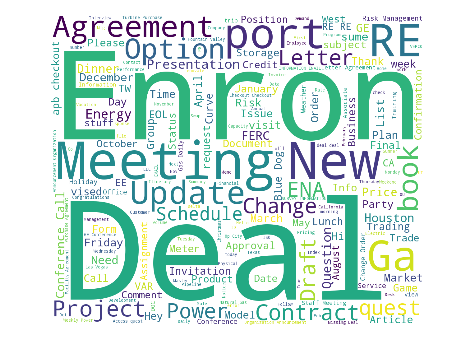

In [10]:
email_subject = email_subject.replace('Re', '')
email_subject = email_subject.replace('FW', '')
email_subject = email_subject.replace('Fw', '')
email_subject = email_subject.replace('Fwd', '')
#print(email_subject)

wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(email_subject)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()